Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model


Data collection and processing

In [ ]:
#Loading the data from csv file to pandas dataframe
calories_data= pd.read_csv('/content/calories_data.csv')
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,31,198,99,28,107,40.9,185
1,male,21,160,68,6,90,39.4,17
2,male,44,171,80,26,112,40.8,197
3,female,32,162,65,16,94,40.1,78
4,female,20,156,51,20,88,40.5,84


In [ ]:
calories_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,31,198,99,28,107,40.9,185
1,male,21,160,68,6,90,39.4,17
2,male,44,171,80,26,112,40.8,197
3,female,32,162,65,16,94,40.1,78
4,female,20,156,51,20,88,40.5,84
...,...,...,...,...,...,...,...,...
338,female,30,163,58,22,109,40.5,143
339,female,33,163,57,4,84,38.7,16
340,male,38,189,91,24,100,40.5,137
341,male,20,183,81,17,97,40.5,71


In [ ]:
#checking the no of rows and cols
calories_data.shape

(343, 8)

In [ ]:
#getting some info about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      343 non-null    object 
 1   Age         343 non-null    int64  
 2   Height      343 non-null    int64  
 3   Weight      343 non-null    int64  
 4   Duration    343 non-null    int64  
 5   Heart_Rate  343 non-null    int64  
 6   Body_Temp   343 non-null    float64
 7   Calories    343 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.6+ KB


In [ ]:
#checking for missing data
calories_data.isnull().sum()



Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
#get some statistical measures about the data
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,42.364431,173.749271,74.641399,16.072886,95.860058,40.074927,94.008746
std,16.555016,14.443724,15.170463,8.304367,9.794867,0.788930,63.122710
min,20.000000,133.000000,43.000000,1.000000,73.000000,37.700000,3.000000
25%,28.000000,163.000000,62.000000,9.000000,88.000000,39.650000,38.500000
50%,39.000000,174.000000,73.000000,17.000000,96.000000,40.300000,87.000000
75%,56.000000,184.000000,86.000000,23.000000,103.500000,40.650000,143.000000
max,79.000000,205.000000,112.000000,30.000000,115.000000,41.400000,257.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


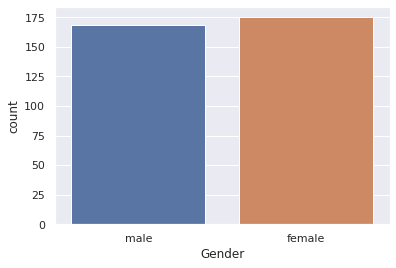

In [ ]:
sns.set()
#plotting the gender col in count plot
sns.countplot(calories_data['Gender'])

Finding the correlation in the dataset
1. positive
2. negative

In [ ]:
correlation = calories_data.corr()

In [ ]:
calories_data.replace({"Gender": {'male':0, 'female':1}}, inplace= True)
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,31,198,99,28,107,40.9,185
1,0,21,160,68,6,90,39.4,17
2,0,44,171,80,26,112,40.8,197
3,1,32,162,65,16,94,40.1,78
4,1,20,156,51,20,88,40.5,84


In [ ]:
calories_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,31,198,99,28,107,40.9,185
1,0,21,160,68,6,90,39.4,17
2,0,44,171,80,26,112,40.8,197
3,1,32,162,65,16,94,40.1,78
4,1,20,156,51,20,88,40.5,84
...,...,...,...,...,...,...,...,...
338,1,30,163,58,22,109,40.5,143
339,1,33,163,57,4,84,38.7,16
340,0,38,189,91,24,100,40.5,137
341,0,20,183,81,17,97,40.5,71


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

X= calories_data.iloc[:,0:7].values
Y= calories_data.iloc[:,7:8].values
scale = StandardScaler()
X= scale.fit_transform(X)
Y= scale.fit_transform(Y)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=0)

Separating features and targets

In [ ]:
#X= calories_data.drop(columns=['Calories'], axis=1)
#Y= calories_data['Calories']



In [ ]:
X

array([[  0. ,  31. , 198. , ...,  28. , 107. ,  40.9],
       [  0. ,  21. , 160. , ...,   6. ,  90. ,  39.4],
       [  0. ,  44. , 171. , ...,  26. , 112. ,  40.8],
       ...,
       [  0. ,  38. , 189. , ...,  24. , 100. ,  40.5],
       [  0. ,  20. , 183. , ...,  17. ,  97. ,  40.5],
       [  1. ,  67. , 159. , ...,  13. ,  94. ,  40.2]])

In [ ]:
Y

array([[185],
       [ 17],
       [197],
       [ 78],
       [ 84],
       [ 12],
       [128],
       [115],
       [ 17],
       [154],
       [104],
       [ 87],
       [206],
       [ 43],
       [ 63],
       [137],
       [ 31],
       [ 22],
       [ 40],
       [122],
       [102],
       [198],
       [178],
       [109],
       [150],
       [121],
       [ 25],
       [ 69],
       [169],
       [ 37],
       [114],
       [ 62],
       [ 97],
       [ 91],
       [ 80],
       [204],
       [151],
       [ 20],
       [133],
       [ 64],
       [ 24],
       [ 60],
       [183],
       [ 38],
       [110],
       [117],
       [164],
       [ 67],
       [  8],
       [ 73],
       [ 15],
       [ 65],
       [ 37],
       [121],
       [ 71],
       [117],
       [ 23],
       [166],
       [ 95],
       [  3],
       [143],
       [  4],
       [205],
       [ 76],
       [ 41],
       [ 78],
       [  5],
       [ 23],
       [232],
       [100],
       [ 84],
      

Splitting the data into Training data and test data

In [ ]:
#X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
#print(X.shape, X_train.shape, X_test.shape)

In [ ]:
#print(Y.shape, Y_train.shape, Y_test.shape)

MODEL 

Linear

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [ ]:

regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred
mse_l = MSE(Y_test,y_pred)
print("MSE of Linear Regression: ",mse_l)
rmse_l = mse_l**(1/2)
print("RMSE of Linear Regression: ",rmse_l)
mae_l = MAE(Y_test,y_pred)
print("MAE of Linear Regression: ",mae_l)
rsquare_l = r2(Y_test,y_pred)
print("R_Square of Linear Regression: ",rsquare_l)
regressor.score(X,Y)

MSE of Linear Regression:  181.9795610942511
RMSE of Linear Regression:  13.489980025717276
MAE of Linear Regression:  10.490698160459669
R_Square of Linear Regression:  0.955685317415508


0.9717936071588099

Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train,Y_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly,Y_train)


y_pred = model.predict(poly.fit_transform(X_test))
y_pred
mse_p = MSE(Y_test,y_pred)
print("MSE of Polynomial Linear Regression: ",mse_p)
rmse_p = mse_p**(1/2)
print("RMSE of Polynomial Linear Regression: ",rmse_p)
mae_p = MAE(Y_test,y_pred)
print("MAE of Polynomial Regression: ",mae_p)
rsquare_p = r2(Y_test,y_pred)
print("R_Square of Polynomial Regression: ",rsquare_p)
model.score(poly.fit_transform(X_test),Y_test)

MSE of Polynomial Linear Regression:  0.7951215072816428
RMSE of Polynomial Linear Regression:  0.891695860303076
MAE of Polynomial Regression:  0.6601017720565416
R_Square of Polynomial Regression:  0.999806376293033


0.999806376293033

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RfReg = RandomForestRegressor(n_estimators=34, random_state=0)
RfReg.fit(X_train,Y_train)
y_pred = RfReg.predict(X_test)
y_pred
mse_r = MSE(Y_test,y_pred)
print("MSE of Random Forest Regression: ",mse_r)
rmse_r = mse_r**(1/2)
print("RMSE of Random Forest Regression: ",rmse_r)
mae_r = MAE(Y_test,y_pred)
print("MAE of Random Forest Regression: ",mae_r)
rsquare_r = r2(Y_test,y_pred)
print("R_Square of Random Forest Regression: ",rsquare_r)
RfReg.score(X_test,Y_test)

MSE of Random Forest Regression:  86.62069354596056
RMSE of Random Forest Regression:  9.30702388231386
MAE of Random Forest Regression:  6.653452685421994
R_Square of Random Forest Regression:  0.9789065952425848


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9789065952425848

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE 

dt = DecisionTreeRegressor(max_depth=7,min_samples_leaf=0.1,random_state=0)
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
y_pred
mse_d = MSE(Y_test,y_pred)
print("MSE of Decision Tree Regression: ",mse_d)
rmse_d = mse_d**(1/2)
print("RMSE of Decision Tree Regression: ",rmse_d)
mae_d = MAE(Y_test,y_pred)
print("MAE of Decision Tree Regression: ",mae_d)
rsquare_d = r2(Y_test,y_pred)
print("R_Square of Decision Tree Regression: ",rsquare_d)
dt.score(X_test,Y_test)

MSE of Decision Tree Regression:  408.6518472348798
RMSE of Decision Tree Regression:  20.2151390604883
MAE of Decision Tree Regression:  15.710391080990156
R_Square of Decision Tree Regression:  0.9004873031405937


0.9004873031405937

Bayesian Ridge

In [ ]:
BayReg = linear_model.BayesianRidge()
BayReg.fit(X_train,Y_train)

y_pred = BayReg.predict(X_test)
y_pred

mse_b = MSE(Y_test,y_pred)
print("MSE of Bayesian Regression: ",mse_b)
rmse_b = mse_b**(1/2)
print("RMSE of Bayesian Regression: ",rmse_d)
mae_b = MAE(Y_test,y_pred)
print("MAE of Bayesian Regression: ",mae_b)
rsquare_b = r2(Y_test,y_pred)
print("R_Square of Bayesian Regression: ",rsquare_b)
BayReg.score(X,Y)

MSE of Bayesian Regression:  183.24477095323047
RMSE of Bayesian Regression:  20.2151390604883
MAE of Bayesian Regression:  10.488359749603378
R_Square of Bayesian Regression:  0.9553772203250088


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9717008163568663

Support Vector

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_test)
y_pred

mse_s = MSE(Y_test,y_pred)
print("MSE of Support Vector Regression: ",mse_s)
rmse_s = mse_s**(1/2)
print("RMSE of Support Vector Regression: ",rmse_s)
mae_s = MAE(Y_test,y_pred)
print("MAE of Support Vector Regression: ",mae_s)
rsquare_s = r2(Y_test,y_pred)
print("R_Square of Support Vector Regression: ",rsquare_s)
regressor.score(X_test,Y_test)

MSE of Support Vector Regression:  3787.638398229001
RMSE of Support Vector Regression:  61.543792523933725
MAE of Support Vector Regression:  50.22112182855106
R_Square of Support Vector Regression:  0.07765469730185848


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.07765469730185848

In [ ]:
y_pred = regressor.predict([[1,67,159,62,13,94,40.2 ]])
y_pred

array([86.57756651])